<a href="https://colab.research.google.com/github/NikolayLenkovNikolaev/SoftUni/blob/main/1_Data_Surv_Coh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
!pip install lifelines
!pip install scikit-survival
!pip install -U scikit-learn

In [113]:
%matplotlib inline

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings("ignore")

In [115]:
from packaging import version
import sklearn
import lifelines

sklearn.__version__
lifelines.__version__

'1.2.2'

'0.27.8'

In [119]:
############## LifeLine ###############
from lifelines.datasets import load_gbsg2
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter
from lifelines.statistics import proportional_hazard_test
from lifelines import WeibullFitter, ExponentialFitter,\
                      LogNormalFitter, LogLogisticFitter, WeibullAFTFitter
from lifelines.utils import median_survival_times, qth_survival_times

############## Sciket Learn ###########
#from sklearn.preprocessing import OrdinalEncoder

############## Sciket Survive #########
from sksurv.column import encode_categorical, categorical_to_numeric
from sksurv.preprocessing  import OneHotEncoder
from sksurv.ensemble       import RandomSurvivalForest
from sksurv.datasets       import load_gbsg2

ImportError: ignored

In [120]:
from lifelines.datasets import load_gbsg2
data = load_gbsg2()
df = data
df.head()

,horTh,age,menostat,tsize,tgrade,pnodes,progrec,estrec,time,cens
0,no,70,Post,21,II,3,48,66,1814,1
1,yes,56,Post,12,II,7,61,77,2018,1
2,yes,58,Post,35,II,9,52,271,712,1
3,yes,59,Post,17,II,4,60,29,1807,1
4,no,73,Post,35,II,1,26,65,772,1


In [121]:
from IPython.core.async_helpers import indent
cols = ["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "TIME", "CENS"]
df.columns = cols
df.head()


df.to_csv('/content/drive/MyDrive/Repositories/Survival Analysis/SoftUni/data_softuni/raw_data_softuni.csv', index=False)

,X1,X2,X3,X4,X5,X6,X7,X8,TIME,CENS
0,no,70,Post,21,II,3,48,66,1814,1
1,yes,56,Post,12,II,7,61,77,2018,1
2,yes,58,Post,35,II,9,52,271,712,1
3,yes,59,Post,17,II,4,60,29,1807,1
4,no,73,Post,35,II,1,26,65,772,1


In [122]:
raw_data = pd.read_csv("/content/drive/MyDrive/Repositories/Survival Analysis/SoftUni/data_softuni/raw_data_softuni.csv")
raw_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,TIME,CENS
0,no,70,Post,21,II,3,48,66,1814,1
1,yes,56,Post,12,II,7,61,77,2018,1
2,yes,58,Post,35,II,9,52,271,712,1
3,yes,59,Post,17,II,4,60,29,1807,1
4,no,73,Post,35,II,1,26,65,772,1


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X1      686 non-null    object
 1   X2      686 non-null    int64 
 2   X3      686 non-null    object
 3   X4      686 non-null    int64 
 4   X5      686 non-null    object
 5   X6      686 non-null    int64 
 6   X7      686 non-null    int64 
 7   X8      686 non-null    int64 
 8   TIME    686 non-null    int64 
 9   CENS    686 non-null    int64 
dtypes: int64(7), object(3)
memory usage: 53.7+ KB


In [124]:
df.isnull().sum()

X1      0
X2      0
X3      0
X4      0
X5      0
X6      0
X7      0
X8      0
TIME    0
CENS    0
dtype: int64

In [125]:
print(f"The dataset have shape: {df.shape}")

The dataset have shape: (686, 10)


In [126]:
round(df.describe().drop(["25%", "75%"]), 2)

,X2,X4,X6,X7,X8,TIME,CENS
count,686.00,686.00,686.00,686.00,686.00,686.00,686.00
mean,53.05,29.33,5.01,110.00,96.25,1124.49,0.44
std,10.12,14.30,5.48,202.33,153.08,642.79,0.50
min,21.00,3.00,1.00,0.00,0.00,8.00,0.00
50%,53.00,25.00,3.00,32.50,36.00,1084.00,0.00
max,80.00,120.00,51.00,2380.00,1144.00,2659.00,1.00


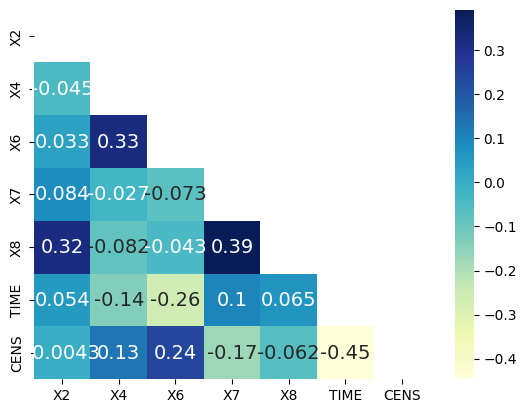

In [127]:
# creating mask
mask = np.triu(np.ones_like(df.corr()))

# plotting a triangle correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, mask=mask)

# displaying heatmap
plt.show()

## Eught censoring

((0.0, 300.0), (0.0, 4.0))

Text(0.5, 0, 'Time (Months)')

([<matplotlib.axis.YTick at 0x7ef9ad800a90>,
 [Text(0, 1, 'Patient C'), Text(0, 2, 'Patient B'), Text(0, 3, 'Patient A')])

Text(0.5, 1.0, 'Right Censoring')

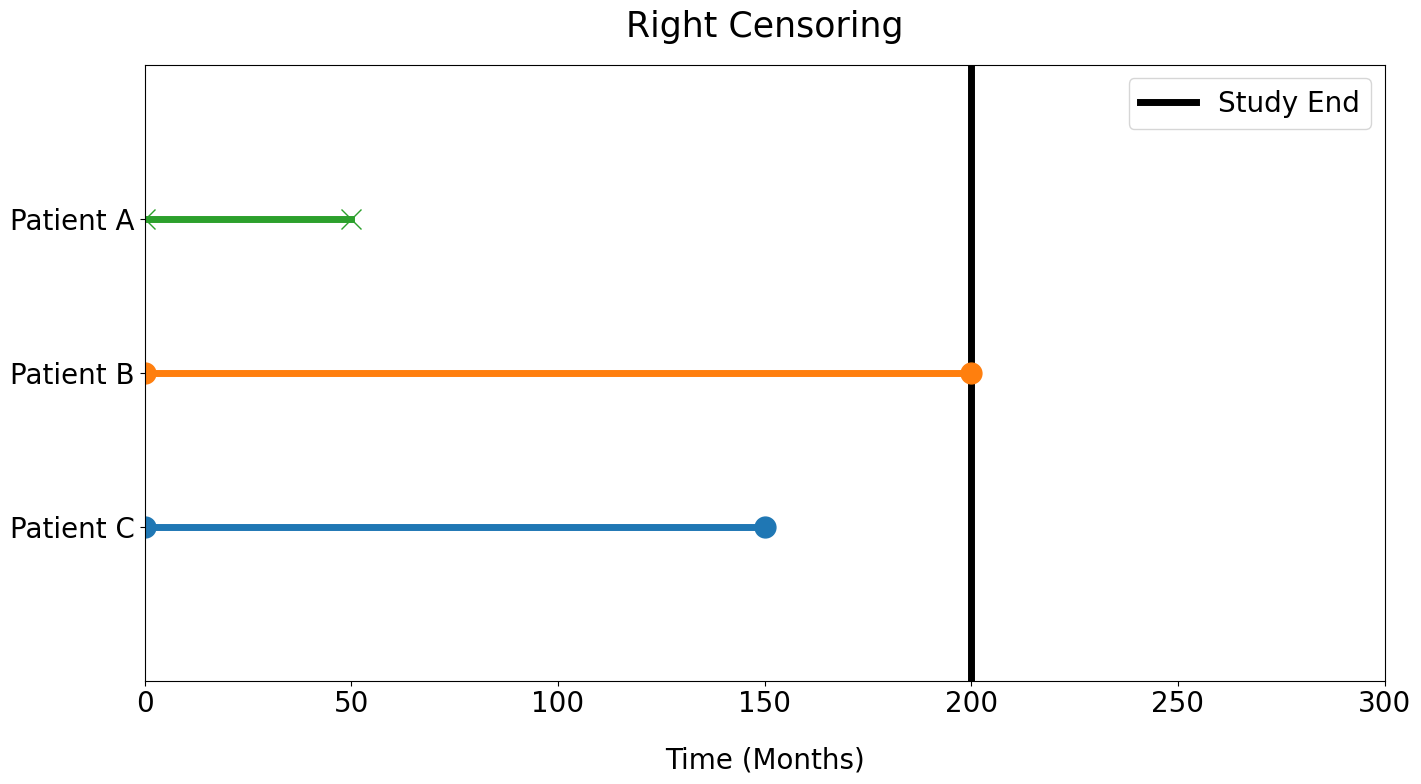

In [128]:
fig = plt.figure(figsize=(16, 8))

plt.xlim(0, 300), plt.ylim(0, 4)
plt.axvline(200, color='black', label='Study End', linewidth=5)
plt.plot([0, 150], [1, 1], marker='o', markersize=15, linewidth=5)
plt.plot([0, 200], [2, 2], marker='o', markersize=15, linewidth=5)
plt.plot([0, 50], [3, 3], marker='x', markersize=15, linewidth=5)

plt.xlabel('Time (Months)', size=20, labelpad=20)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.yticks([1, 2, 3], ['Patient C', 'Patient B', 'Patient A'])
plt.legend(prop={'size': 20})
plt.title('Right Censoring', size=25, pad=20)

plt.show()

In [129]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,TIME,CENS
0,no,70,Post,21,II,3,48,66,1814,1
1,yes,56,Post,12,II,7,61,77,2018,1
2,yes,58,Post,35,II,9,52,271,712,1
3,yes,59,Post,17,II,4,60,29,1807,1
4,no,73,Post,35,II,1,26,65,772,1


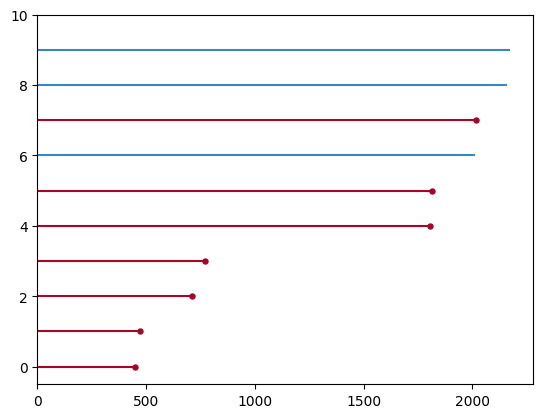

In [130]:
T, E = raw_data["TIME"], raw_data["CENS"]
ax = plot_lifetimes(T[:10], event_observed=E[:10])

## Proprocessing Data

In [131]:
raw_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,TIME,CENS
0,no,70,Post,21,II,3,48,66,1814,1
1,yes,56,Post,12,II,7,61,77,2018,1
2,yes,58,Post,35,II,9,52,271,712,1
3,yes,59,Post,17,II,4,60,29,1807,1
4,no,73,Post,35,II,1,26,65,772,1


In [133]:
grade_str = raw_data.loc[:, "X5"].astype(object).values[:, np.newaxis]
grade_num = OrdinalEncoder(categories=[["I", "II", "III"]]).fit_transform(grade_str)

raw_data.loc[:, "X5"] = grade_num

raw_data["X5"] = encode_categorical(dar_data["X5"])
raw_data["X1"] = encode_categorical(raw_data["X1"])
raw_data.head()


NameError: ignored

In [ ]:
# AUC

from lifelines.utils import restricted_mean_survival_time
from lifelines.datasets import load_waltons
from lifelines.plotting import rmst_plot

df = load_waltons()
ix = df['group'] == 'miR-137'
T, E = df['T'], df['E']
time_limit = 50

kmf_exp = KaplanMeierFitter().fit(T[ix], E[ix], label='exp')
kmf_con = KaplanMeierFitter().fit(T[~ix], E[~ix], label='control')


rmst_plot(kmf_exp, t=time_limit)

,AIDSY,W,T,D
i,,,,
1,1990.425,4.575,7.575,0
2,1991.250,3.750,6.750,0
3,1992.014,2.986,5.986,0
4,1992.030,2.970,5.970,0
5,1992.072,2.928,5.928,0


<Axes: >

Text(0, 0.5, 'Patient Number')

Text(0.5, 0, 'Years from AIDS diagnosis')

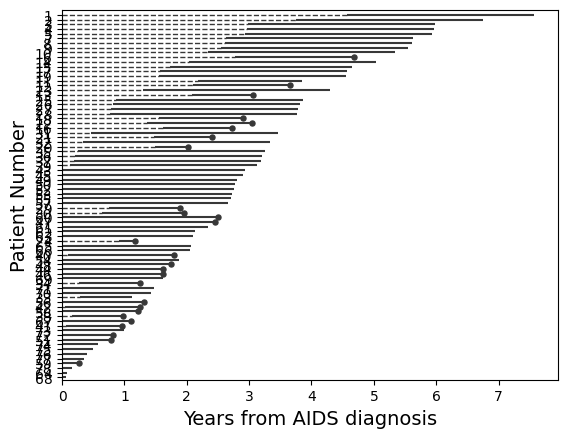

In [135]:
from lifelines.datasets import load_multicenter_aids_cohort_study
from lifelines.plotting import plot_lifetimes

df = load_multicenter_aids_cohort_study()
df.head()

plot_lifetimes(
    df["T"],
    event_observed=df["D"],
    entry=df["W"],
    event_observed_color="#383838",
    event_censored_color="#383838",
    left_truncated=True,
)
plt.ylabel("Patient Number")
plt.xlabel("Years from AIDS diagnosis")

In [137]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

from lifelines.datasets import load_waltons
waltons = load_waltons()
T, E = waltons['T'], waltons['E']
waltons.head()

,T,E,group
0,6.0,1,miR-137
1,13.0,1,miR-137
2,13.0,1,miR-137
3,13.0,1,miR-137
4,19.0,1,miR-137
